In [1]:
!pip install pandas numpy scipy kaleido==0.2.1 matplotlib pyarrow pooch seaborn plotly xarray ipywidgets cfgrib cartopy scikit-learn tensorflow openpyxl

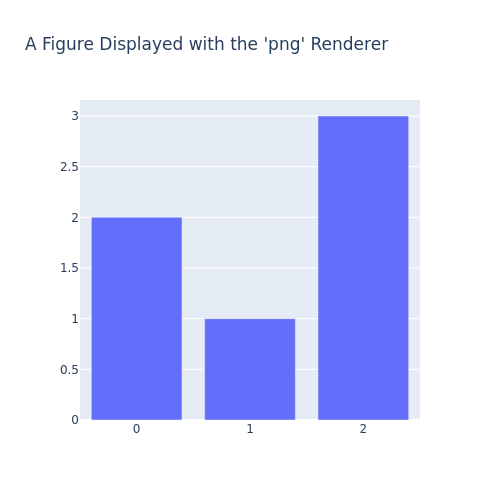

In [2]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500

pio.renderers.default = "png"

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'png' Renderer"
)
fig.show()

In [3]:
import plotly.express as px
import xarray as xr
from IPython.display import Image
from matplotlib import pyplot as plt
import random
import numpy as np

In [4]:
import pandas as pd
# uncomment to add 2024 year to 2007-2025 
hourly_df = pd.read_parquet('./caiso_oasis_14_25.parquet')
#df2025 = pd.read_csv("2025_nsphourly.csv", parse_dates=["datetime"])
#hourly_df = pd.concat([hourly_df4, df2025], ignore_index=True, sort=True)
#hourly_df.index = pd.to_datetime(hourly_df['datetime'])
#hourly_df = hourly_df.sort_index()

In [5]:
#hourly_df.to_csv('./caiso_oasis_14_25.csv')

In [6]:
# there was a ' ' missing datapoint 
# (not null, but with a space that caused the dtype of the column to be object), fixed manually by deleting it.
#df2025['load_MW'] = df2025['load_MW'].astype(float)

In [7]:
hourly_df

,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
Date,,,,,,,,,,,,
2014-05-01 00:00:00,23355.66,0.0,280.94,23074.72,1848.36,2287.27,1399.07,7413.20,15940.38,10405.68,2.08,2881
2014-05-01 01:00:00,22257.04,0.0,360.14,21896.91,1919.63,2287.41,1115.12,7399.60,14857.99,9535.83,-0.54,2882
2014-05-01 02:00:00,21871.18,0.0,480.43,21390.75,2010.66,2286.25,1269.65,7468.35,14402.61,8836.05,0.22,2883
2014-05-01 03:00:00,21789.77,0.0,598.26,21191.51,2135.10,2286.51,1381.97,7436.30,14353.19,8549.61,0.28,2884
2014-05-01 04:00:00,22113.85,0.0,469.55,21644.30,2007.56,2287.40,1130.59,7536.23,14576.94,9151.39,0.68,2885
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-30 19:00:00,25987.12,0.0,1604.70,24382.42,2912.78,2254.51,2728.49,5662.16,20324.96,12429.17,0.00,8012
2025-11-30 20:00:00,25348.24,0.0,1267.36,24080.88,2581.54,2258.58,2671.89,5698.75,19649.44,12137.43,0.05,8013
2025-11-30 21:00:00,24809.21,0.0,1418.44,23390.77,2725.73,2260.43,2529.44,6024.43,18784.76,11269.16,0.03,8014


In [8]:
# Generate complete hourly range for Q1 of 2024
start_q1 = '2014-01-01 00:00:00'
end_q1 = '2014-04-30 23:00:00'
complete_hourly_range = pd.date_range(start=start_q1, end=end_q1, freq='h')
complete_hourly_range

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-04-30 14:00:00', '2014-04-30 15:00:00',
               '2014-04-30 16:00:00', '2014-04-30 17:00:00',
               '2014-04-30 18:00:00', '2014-04-30 19:00:00',
               '2014-04-30 20:00:00', '2014-04-30 21:00:00',
               '2014-04-30 22:00:00', '2014-04-30 23:00:00'],
              dtype='datetime64[ns]', length=2880, freq='h')

In [9]:
new_index_range = pd.date_range(start=start_q1, end=end_q1, freq='h')

new_rows_df = pd.DataFrame(index=new_index_range, columns=hourly_df.columns)
new_rows_df = new_rows_df.fillna(0)
new_rows_df

/tmp/ipykernel_1145/1744037319.py:6: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
2014-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-30 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2014-04-30 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2014-04-30 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2014-04-30 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
def calculate_hour_of_year(df, datetime_col_name):
    # Ensure the column is a datetime object
    df.index = pd.to_datetime(df.index)

    # Extract the date of the beginning of the year for each row
    # astype('M8[Y]') truncates the date to the beginning of the year
    #df['Year_Start'] = df[datetime_col_name].astype('M8[Y]')
    #df['Year_Start'] = df[datetime_col_name].dt.year
    # Create the 'Year_Start' column, making sure it is also a datetime object
    df['Year_Start'] = pd.to_datetime(df.index.year, format='%Y')

    # Calculate the time difference (timedelta) from the start of the year
    time_delta = df.index - df['Year_Start']

    # Convert the timedelta to total hours and add 1 to get a 1-based index (1 to 8760)
    # The .dt accessor is used to access the time properties of the Timedelta series
    df['hour_index'] = time_delta.dt.total_seconds() // 3600 + 1
    
    # Clean up the temporary column
    df = df.drop(columns=['Year_Start'])
    
    # Convert to integer type
    df['hour_index'] = df['hour_index'].astype(int)

    return df

In [11]:
new_rows_df = calculate_hour_of_year(new_rows_df, 'Date')
new_rows_df

,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
2014-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,1
2014-01-01 01:00:00,0,0,0,0,0,0,0,0,0,0,0,2
2014-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,0,3
2014-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,0,4
2014-01-01 04:00:00,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-30 19:00:00,0,0,0,0,0,0,0,0,0,0,0,2876
2014-04-30 20:00:00,0,0,0,0,0,0,0,0,0,0,0,2877
2014-04-30 21:00:00,0,0,0,0,0,0,0,0,0,0,0,2878
2014-04-30 22:00:00,0,0,0,0,0,0,0,0,0,0,0,2879


In [13]:
hourly_df8 = pd.concat([new_rows_df, hourly_df])
hourly_df8

,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
2014-01-01 00:00:00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
2014-01-01 01:00:00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
2014-01-01 02:00:00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
2014-01-01 03:00:00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4
2014-01-01 04:00:00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-30 19:00:00,25987.12,0.0,1604.70,24382.42,2912.78,2254.51,2728.49,5662.16,20324.96,12429.17,0.00,8012
2025-11-30 20:00:00,25348.24,0.0,1267.36,24080.88,2581.54,2258.58,2671.89,5698.75,19649.44,12137.43,0.05,8013
2025-11-30 21:00:00,24809.21,0.0,1418.44,23390.77,2725.73,2260.43,2529.44,6024.43,18784.76,11269.16,0.03,8014
2025-11-30 22:00:00,23674.72,0.0,1451.31,22223.42,2745.27,2259.22,2156.07,6977.09,16697.66,9537.10,-0.03,8015


In [19]:
#dftemp = hourly_df8.loc['2014-04-30':'2014-05-01']
#dftemp

In [20]:
#hourly_df.to_parquet('./oasis_07_25.parquet', compression=None)

In [21]:
#hourly_df2 = pd.read_parquet('./oasis_07_25.parquet')
#hourly_df2

In [22]:
summary_df = hourly_df8.groupby(hourly_df8.index.year)['Solar'].agg(['sum', 'median', 'max', 'min'])
summary_df['sum'] = summary_df['sum']/1000000
summary_df

,sum,median,max,min
2014,8.439724,0.00,4889.13,0.0
2015,15.681915,100.99,6452.27,0.0
2016,20.778361,136.23,8527.94,0.0
2017,25.354200,180.42,9893.60,0.0
2018,27.779150,182.44,10728.68,0.0
2019,28.619041,198.10,11428.19,0.0
2020,29.990484,208.98,11854.23,0.0
2021,34.057267,271.39,13001.35,0.0
2022,37.079956,324.52,14131.26,0.0
2023,39.806415,340.05,15984.23,0.0


In [23]:
oasis2 = hourly_df8[['Solar']]

In [24]:
import seaborn as sns

In [25]:
df = oasis2.copy()
df['hour'] = df.index.hour
df['month'] = df.index.month
df['year'] = df.index.year
df['day'] = df.index.day
df['date'] = df.index.date
df['weekdayName'] = df.index.day_name() # df.date.dt.weekday_name on older Pandas
df['weekday'] = df.index.weekday
#df['week'] = df.datetime.dt.week
df['weekend'] = df.index.weekday // 5 == 1

In [26]:
import calendar
hour_abbr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
all_month_year_df = pd.pivot_table(df, values="Solar",index=["hour"],
                                   columns=["month"],
                                   fill_value=0,
                                   margins=True)
named_index = [[hour_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

month,1,2,3,4,5,6,7,8,9,10,11,12,All
0,0.006156,2.713746,3.720134,3.661028,11.313011,6.916222,1.718091,1.053441,0.426667,0.862876,0.612583,0.099208,2.776275
1,0.010699,2.324395,3.323763,3.569194,11.227473,6.719000,1.494677,0.839597,0.332278,0.636478,0.500917,0.097889,2.607355
2,0.002177,2.268761,3.236233,3.348250,11.213172,6.244556,1.292554,0.886774,0.332056,0.634919,0.494222,0.095132,2.520090
3,0.000860,2.408525,2.894866,2.811361,10.301344,5.812194,1.243952,0.824597,0.335417,0.629731,0.566778,0.088563,2.341229
4,0.016022,2.483540,2.502312,2.421056,8.855968,5.636806,1.505780,0.775457,0.325861,0.626532,0.537639,0.083754,2.158801
5,0.130134,2.576696,2.360161,8.952306,22.258683,43.302972,7.509194,0.971478,0.316472,0.685941,0.650917,0.098270,7.510057
6,7.197258,135.947139,186.077339,448.957528,1512.413118,1958.108694,1213.690081,445.905376,101.626000,7.120591,277.665722,23.794692,531.209359
7,1142.575780,2554.598437,2257.829543,3824.539917,5736.219328,6273.388306,5310.010699,4020.497446,2768.878694,1465.497339,3169.204028,1399.636598,3338.967670
8,4359.856317,6213.581917,5825.950914,7443.357972,8538.230000,8945.686806,8501.755054,8074.940296,7409.707889,6173.393763,6791.497167,4542.068856,6915.467530
9,6142.327688,7621.970324,7600.088683,8738.097250,9659.189301,10138.567639,9954.763280,9874.108306,9631.474944,8925.781237,8209.589861,6200.900205,8575.107022


In [27]:
df

,Solar,hour,month,year,day,date,weekdayName,weekday,weekend
2014-01-01 00:00:00,0.0,0,1,2014,1,2014-01-01,Wednesday,2,False
2014-01-01 01:00:00,0.0,1,1,2014,1,2014-01-01,Wednesday,2,False
2014-01-01 02:00:00,0.0,2,1,2014,1,2014-01-01,Wednesday,2,False
2014-01-01 03:00:00,0.0,3,1,2014,1,2014-01-01,Wednesday,2,False
2014-01-01 04:00:00,0.0,4,1,2014,1,2014-01-01,Wednesday,2,False
...,...,...,...,...,...,...,...,...,...
2025-11-30 19:00:00,0.0,19,11,2025,30,2025-11-30,Sunday,6,True
2025-11-30 20:00:00,0.0,20,11,2025,30,2025-11-30,Sunday,6,True
2025-11-30 21:00:00,0.0,21,11,2025,30,2025-11-30,Sunday,6,True
2025-11-30 22:00:00,0.0,22,11,2025,30,2025-11-30,Sunday,6,True


In [28]:
def plot_heatmap_year3(year):
    #plt.figure(figsize = (30, 6))
    allByYear_df = df.loc[df['year'] == year]
    allByYear_df = pd.pivot_table(allByYear_df, values="Solar",
                                  index=["hour"], columns=["date"], fill_value=None)
    allByYear_df = allByYear_df.set_index([[hour_abbr[i] for i in list(allByYear_df.index)]])

    return allByYear_df

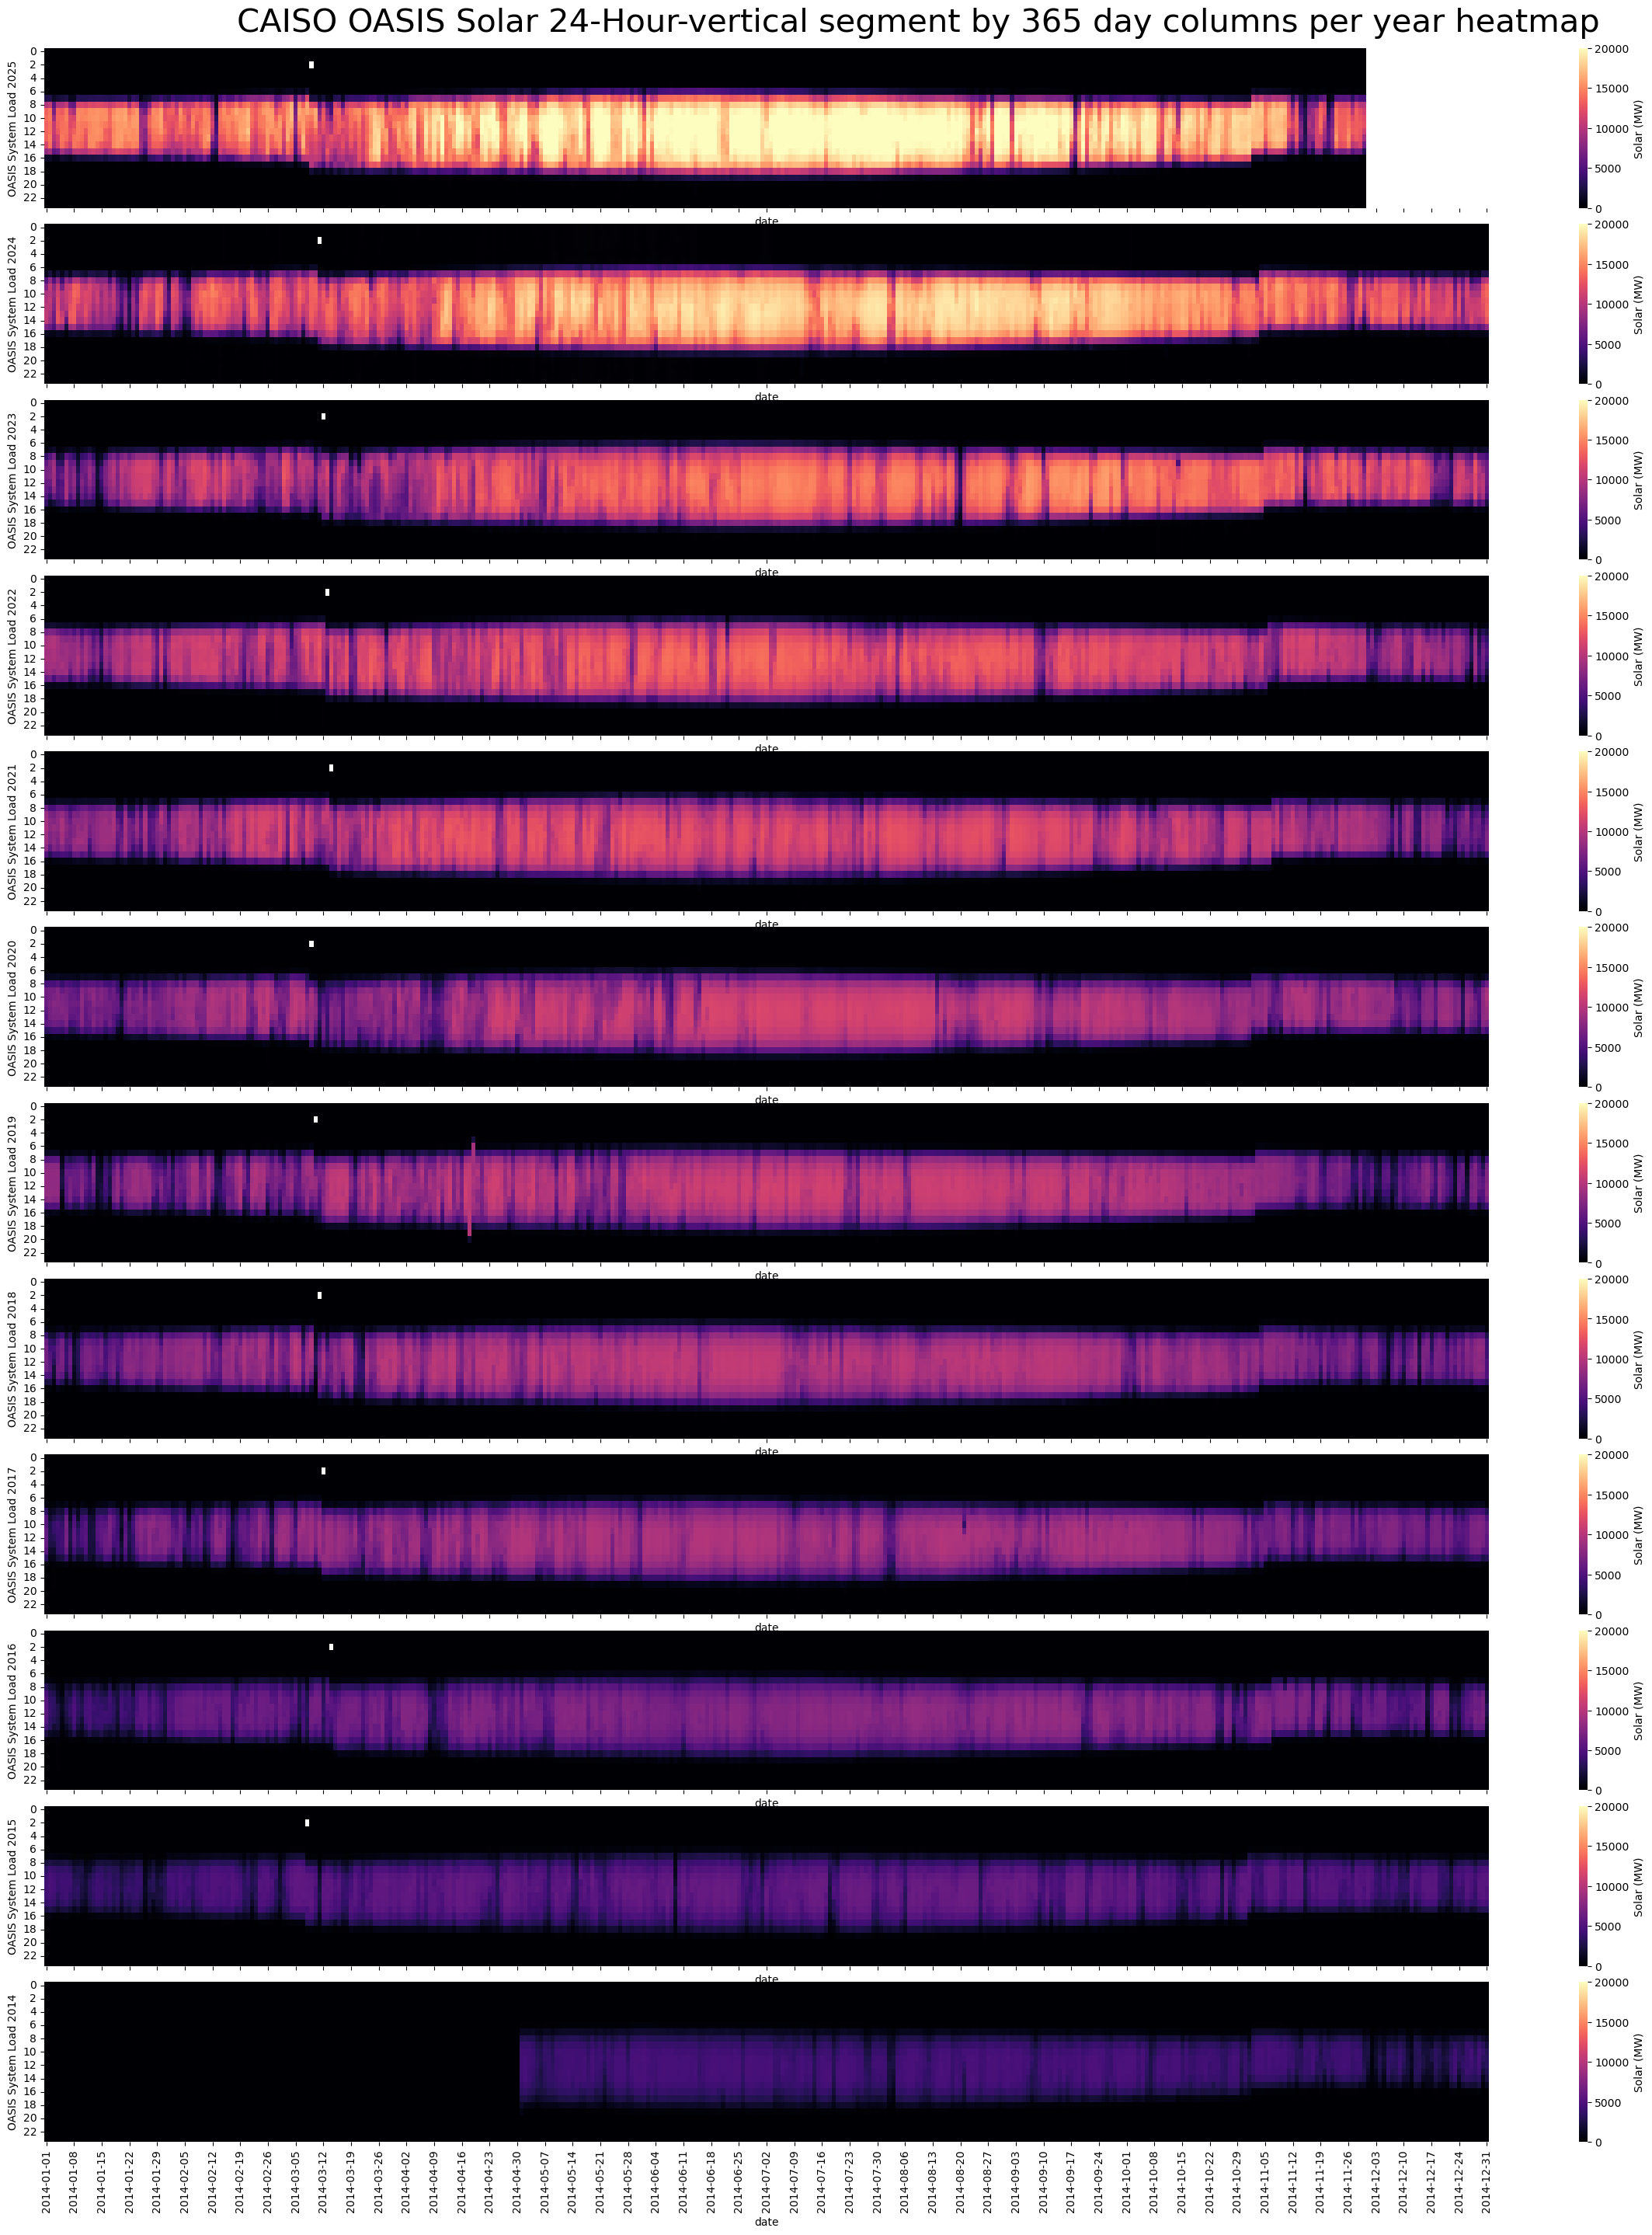

In [29]:
#date_form = mdates.DateFormatter("%b-%d")

fig, axs3 = plt.subplots(12, figsize=(30,35),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

fig.suptitle('CAISO OASIS Solar 24-Hour-vertical segment by 365 day columns per year heatmap', y=0.895, ha='center', fontsize=30)

sns.heatmap(ax=axs3[0], data=plot_heatmap_year3(2025), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Solar (MW)'})

sns.heatmap(ax=axs3[1], data=plot_heatmap_year3(2024), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Solar (MW)'})

sns.heatmap(ax=axs3[2], data=plot_heatmap_year3(2023), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Solar (MW)'})

sns.heatmap(ax=axs3[3], data=plot_heatmap_year3(2022), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Solar (MW)'})
                     #annot_kws={"size": 2}, square=True, cbar_kws={"shrink": .48, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[4], data=plot_heatmap_year3(2021), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Solar (MW)'})

sns.heatmap(ax=axs3[5], data=plot_heatmap_year3(2020), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Solar (MW)'})

sns.heatmap(ax=axs3[6], data=plot_heatmap_year3(2019), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Solar (MW)'})

sns.heatmap(ax=axs3[7], data=plot_heatmap_year3(2018), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Solar (MW)'})

sns.heatmap(ax=axs3[8], data=plot_heatmap_year3(2017), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Solar (MW)'})

sns.heatmap(ax=axs3[9], data=plot_heatmap_year3(2016), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Solar (MW)'})

sns.heatmap(ax=axs3[10], data=plot_heatmap_year3(2015), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Solar (MW)'})

sns.heatmap(ax=axs3[11], data=plot_heatmap_year3(2014), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Solar (MW)'})



yearlist = [2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

for year, ax in enumerate(axs3.flat):
    ax.set(ylabel=f'OASIS System Load {yearlist[year]}')#, title='CAISO OASIS 24-Hour-vertical segment by 365 day columns per year heatmap')

plt.savefig(fname = "caiso_oasis_hourly_figure03a_solar.png", \
                    dpi=125,
                    bbox_inches='tight')

In [30]:
oasis2wind = hourly_df8[['Wind']]

In [31]:
dfwind = oasis2wind.copy()
dfwind['hour'] = dfwind.index.hour
dfwind['month'] = dfwind.index.month
dfwind['year'] = dfwind.index.year
dfwind['day'] = dfwind.index.day
dfwind['date'] = dfwind.index.date
dfwind['weekdayName'] = dfwind.index.day_name() # df.date.dt.weekday_name on older Pandas
dfwind['weekday'] = dfwind.index.weekday
#df['week'] = df.datetime.dt.week
dfwind['weekend'] = dfwind.index.weekday // 5 == 1

In [32]:
hour_abbr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
all_month_year_dfwind = pd.pivot_table(dfwind, values="Wind",index=["hour"],
                                   columns=["month"],
                                   fill_value=0,
                                   margins=True)
named_indexwind = [[hour_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_dfwind.index)]]
all_month_year_dfwind = all_month_year_dfwind.set_index(named_indexwind)
all_month_year_dfwind

month,1,2,3,4,5,6,7,8,9,10,11,12,All
0,1251.730349,1551.908879,2053.074194,2692.098833,3356.987473,3536.345167,3250.681774,2952.066317,2230.273778,1699.210591,1352.183083,1275.553519,2277.274915
1,1246.389812,1540.027965,2009.168710,2641.095833,3285.868360,3471.010111,3153.573199,2858.543091,2158.729417,1665.229516,1339.626694,1258.593842,2228.952151
2,1218.855349,1522.193864,1960.463019,2581.411389,3195.146478,3343.924139,3022.537392,2727.424220,2069.024583,1611.188656,1341.190222,1251.965308,2163.516641
3,1200.519704,1490.856903,1936.631640,2481.445472,3083.850672,3189.665889,2838.763306,2552.151290,1955.227972,1531.997527,1316.770194,1226.796510,2075.549998
4,1186.111989,1453.076932,1871.848360,2373.513139,2915.096720,3012.053472,2643.067151,2362.416855,1814.944472,1466.221022,1276.556167,1227.135132,1974.320283
5,1166.960806,1415.515221,1792.334919,2256.638972,2725.418199,2801.175639,2422.346398,2166.593925,1672.426194,1397.321263,1239.229472,1221.821026,1862.847615
6,1158.721559,1395.085280,1706.926989,2111.052889,2511.537016,2546.734139,2158.020968,1935.373898,1523.119778,1314.433656,1204.580889,1208.351026,1736.163240
7,1120.287043,1332.973540,1602.036183,1939.894167,2287.342769,2251.887889,1871.058253,1673.730968,1356.134722,1224.567124,1152.502500,1160.879619,1584.946055
8,1082.218737,1296.074749,1540.102339,1837.682917,2109.249220,2003.639583,1603.092070,1432.952903,1232.130139,1136.005484,1157.800417,1124.546364,1465.587700
9,1079.575699,1316.814041,1532.644355,1779.012278,1989.874167,1816.891000,1356.259597,1232.897016,1141.961250,1081.661478,1190.928778,1134.415806,1389.045202


In [33]:
summary_df = hourly_df8.groupby(hourly_df8.index.year)['Wind'].agg(['sum', 'median', 'max', 'min'])

In [34]:
summary_df['sum'] = summary_df['sum']/1000000
summary_df

,sum,median,max,min
2014,9.227545,532.215,4354.58,0.00
2015,12.270606,1189.450,4507.43,0.00
2016,13.877993,1451.990,4675.86,0.00
2017,13.974559,1375.230,4913.58,0.00
2018,16.544083,1764.500,5006.47,0.24
2019,15.846740,1652.810,5243.79,0.60
2020,16.173779,1653.890,5154.33,0.00
2021,18.961039,2026.780,5603.39,4.17
2022,18.468182,1845.550,6023.14,32.01
2023,20.844530,2206.440,6217.92,46.67


In [35]:
dfwind

,Wind,hour,month,year,day,date,weekdayName,weekday,weekend
2014-01-01 00:00:00,0.00,0,1,2014,1,2014-01-01,Wednesday,2,False
2014-01-01 01:00:00,0.00,1,1,2014,1,2014-01-01,Wednesday,2,False
2014-01-01 02:00:00,0.00,2,1,2014,1,2014-01-01,Wednesday,2,False
2014-01-01 03:00:00,0.00,3,1,2014,1,2014-01-01,Wednesday,2,False
2014-01-01 04:00:00,0.00,4,1,2014,1,2014-01-01,Wednesday,2,False
...,...,...,...,...,...,...,...,...,...
2025-11-30 19:00:00,1604.70,19,11,2025,30,2025-11-30,Sunday,6,True
2025-11-30 20:00:00,1267.36,20,11,2025,30,2025-11-30,Sunday,6,True
2025-11-30 21:00:00,1418.44,21,11,2025,30,2025-11-30,Sunday,6,True
2025-11-30 22:00:00,1451.31,22,11,2025,30,2025-11-30,Sunday,6,True


In [36]:
def plot_heatmap_year3wind(year):
    #plt.figure(figsize = (30, 6))
    allByYear_dfwind = dfwind.loc[dfwind['year'] == year]
    allByYear_dfwind = pd.pivot_table(allByYear_dfwind, values="Wind",
                                  index=["hour"], columns=["date"], fill_value=None)
    allByYear_dfwind = allByYear_dfwind.set_index([[hour_abbr[i] for i in list(allByYear_dfwind.index)]])

    return allByYear_dfwind

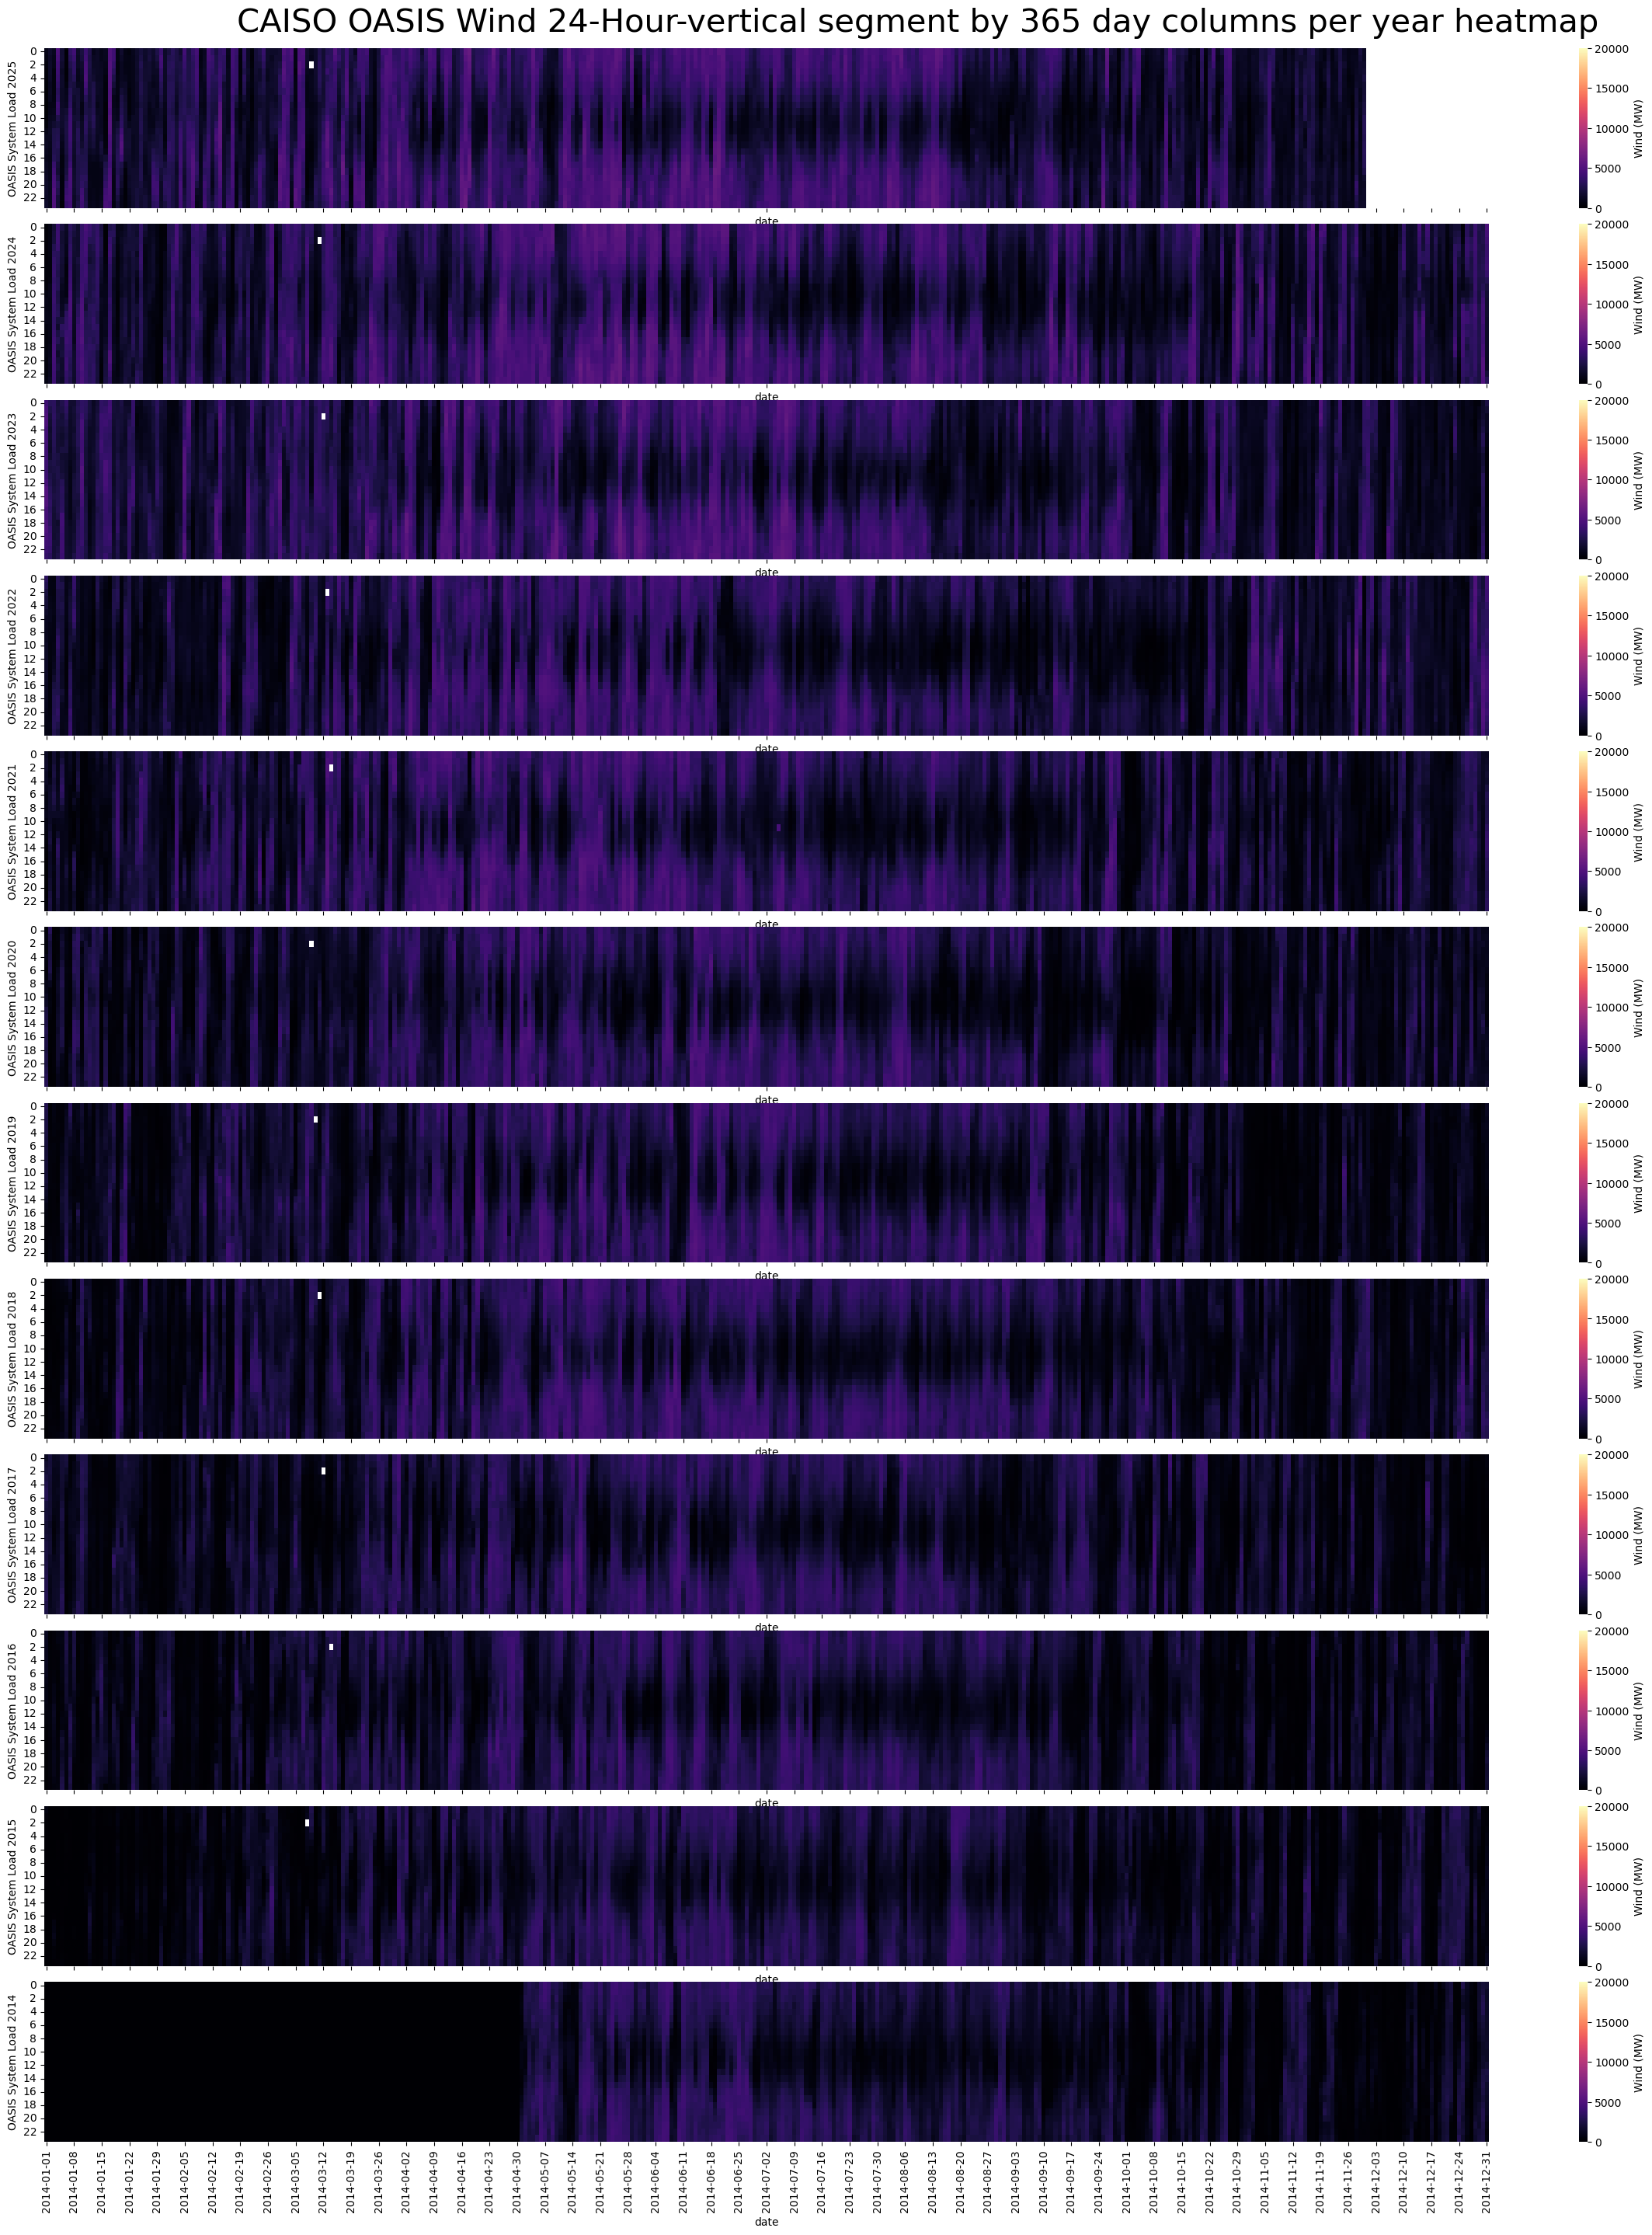

In [39]:
#date_form = mdates.DateFormatter("%b-%d")

fig, axs3 = plt.subplots(12, figsize=(30,35),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

fig.suptitle('CAISO OASIS Wind 24-Hour-vertical segment by 365 day columns per year heatmap', y=0.895, ha='center', fontsize=30)

sns.heatmap(ax=axs3[0], data=plot_heatmap_year3wind(2025), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind (MW)'})

sns.heatmap(ax=axs3[1], data=plot_heatmap_year3wind(2024), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind (MW)'})

sns.heatmap(ax=axs3[2], data=plot_heatmap_year3wind(2023), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind (MW)'})

sns.heatmap(ax=axs3[3], data=plot_heatmap_year3wind(2022), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind (MW)'})
                     #annot_kws={"size": 2}, square=True, cbar_kws={"shrink": .48, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[4], data=plot_heatmap_year3wind(2021), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind (MW)'})

sns.heatmap(ax=axs3[5], data=plot_heatmap_year3wind(2020), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind (MW)'})

sns.heatmap(ax=axs3[6], data=plot_heatmap_year3wind(2019), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind (MW)'})

sns.heatmap(ax=axs3[7], data=plot_heatmap_year3wind(2018), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind (MW)'})

sns.heatmap(ax=axs3[8], data=plot_heatmap_year3wind(2017), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind (MW)'})

sns.heatmap(ax=axs3[9], data=plot_heatmap_year3wind(2016), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind (MW)'})

sns.heatmap(ax=axs3[10], data=plot_heatmap_year3wind(2015), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind (MW)'})

sns.heatmap(ax=axs3[11], data=plot_heatmap_year3wind(2014), cmap = 'magma', xticklabels=7,
                     vmin=0, vmax=20000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind (MW)'})



yearlist = [2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

for year, ax in enumerate(axs3.flat):
    ax.set(ylabel=f'OASIS System Load {yearlist[year]}')#, title='CAISO OASIS 24-Hour-vertical segment by 365 day columns per year heatmap')

plt.savefig(fname = "caiso_oasis_hourly_figure03a_wind_02.png", \
                    dpi=125,
                    bbox_inches='tight')

In [38]:
hourly_df8.to_parquet('./caiso_oasis_2014_01_01_25_11_30.parquet', compression=None)